The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.
In this dataset we will be predicting the total absent hrs with the help of Linear Regression algorithm.

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel('absent.xlsx')

In [4]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WL/D,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.tail()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WL/D,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,0.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,0.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
739,0.0,0.0,6,3,179.0,45.0,14.0,53.0,271219.0,95.0,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


EXPLORATORY DATA ANALYSIS

In [7]:
df.shape

(740, 20)

In [8]:
df.isnull().sum()

Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
WL/D                               10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [103]:
df.groupby('Reason for absence').max()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WL/D,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Reason for absence,,,,,,,,,,,,,,,,,,,
0.0,11.0,6,4,388.0,51.0,18.0,53.0,378884.0,99.0,1.0,3.0,4.0,1.0,1.0,8.0,106.0,185.0,38.0,120.0
1.0,11.0,6,4,388.0,50.0,18.0,58.0,343253.0,99.0,0.0,3.0,4.0,1.0,1.0,4.0,98.0,196.0,32.0,64.0
2.0,11.0,4,4,330.0,16.0,4.0,28.0,268519.0,93.0,0.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,24.0
3.0,1.0,4,2,291.0,31.0,12.0,40.0,330061.0,100.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,8.0
4.0,12.0,5,4,289.0,48.0,29.0,49.0,284853.0,93.0,0.0,1.0,0.0,1.0,0.0,2.0,108.0,172.0,36.0,8.0
5.0,7.0,6,3,179.0,51.0,18.0,50.0,275312.0,99.0,0.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,8.0
6.0,11.0,6,4,289.0,51.0,18.0,58.0,343253.0,99.0,0.0,3.0,2.0,1.0,0.0,2.0,95.0,196.0,31.0,120.0
7.0,11.0,6,4,369.0,52.0,24.0,46.0,378884.0,99.0,0.0,3.0,3.0,1.0,1.0,4.0,90.0,178.0,30.0,40.0
8.0,11.0,6,4,361.0,52.0,17.0,40.0,343253.0,99.0,0.0,2.0,2.0,1.0,1.0,4.0,83.0,172.0,28.0,8.0


In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
#visualizing the null values in dataset with heatmap

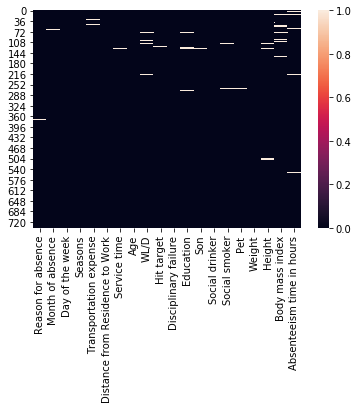

In [11]:
sns.heatmap(df.isnull())

Data cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               737 non-null    float64
 1   Month of absence                 739 non-null    float64
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           733 non-null    float64
 5   Distance from Residence to Work  737 non-null    float64
 6   Service time                     737 non-null    float64
 7   Age                              737 non-null    float64
 8   WL/D                             730 non-null    float64
 9   Hit target                       734 non-null    float64
 10  Disciplinary failure             734 non-null    float64
 11  Education                        730 non-null    float64
 12  Son                   

In [13]:
#removing the null values using simpleimputer method

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp=SimpleImputer(strategy='most_frequent')    #replacing the null values with

In [16]:
a=['Month of absence','Reason for absence','Seasons','Transportation expense','Distance from Residence to Work','Service time','Age','WL/D','Hit target','Disciplinary failure','Education','Son','Social drinker','Social smoker','Pet','Weight','Height','Body mass index','Absenteeism time in hours']

In [17]:
for i in a:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
WL/D                               0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    float64
 1   Month of absence                 740 non-null    float64
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    float64
 5   Distance from Residence to Work  740 non-null    float64
 6   Service time                     740 non-null    float64
 7   Age                              740 non-null    float64
 8   WL/D                             740 non-null    float64
 9   Hit target                       740 non-null    float64
 10  Disciplinary failure             740 non-null    float64
 11  Education                        740 non-null    float64
 12  Son                   

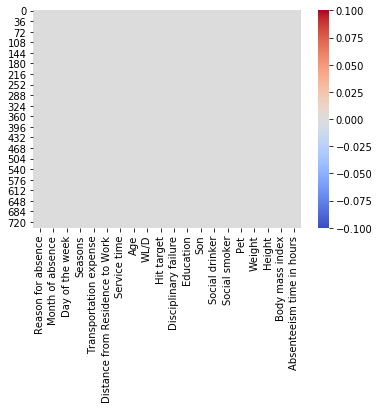

In [20]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [21]:
df.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WL/D,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.204054,6.314865,3.914865,2.544595,220.637838,29.652703,12.587838,36.414865,270526.794595,94.574324,0.052703,1.291892,1.009459,0.568919,0.072973,0.744595,79.077027,172.112162,26.864865,7.008108
std,8.423836,3.435790,1.421675,1.111831,66.760604,14.819790,4.394499,6.489258,39128.835257,3.779961,0.223590,0.673238,1.094292,0.495562,0.260268,1.318510,12.865107,6.030335,4.289977,13.275979
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,241476.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


conclusion:-From the above we can see that in many columns the max value is deviating from the 3rd quartile value so from this we can infer that outliers is present in the dataset ,so further we will visualize the outliers and remove it.From the above we can also infer that the data is skewed as in many columns the mean is greater than median and and vice versa.

In [22]:
#DATA VISUALISATION

In [23]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'WL/D', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

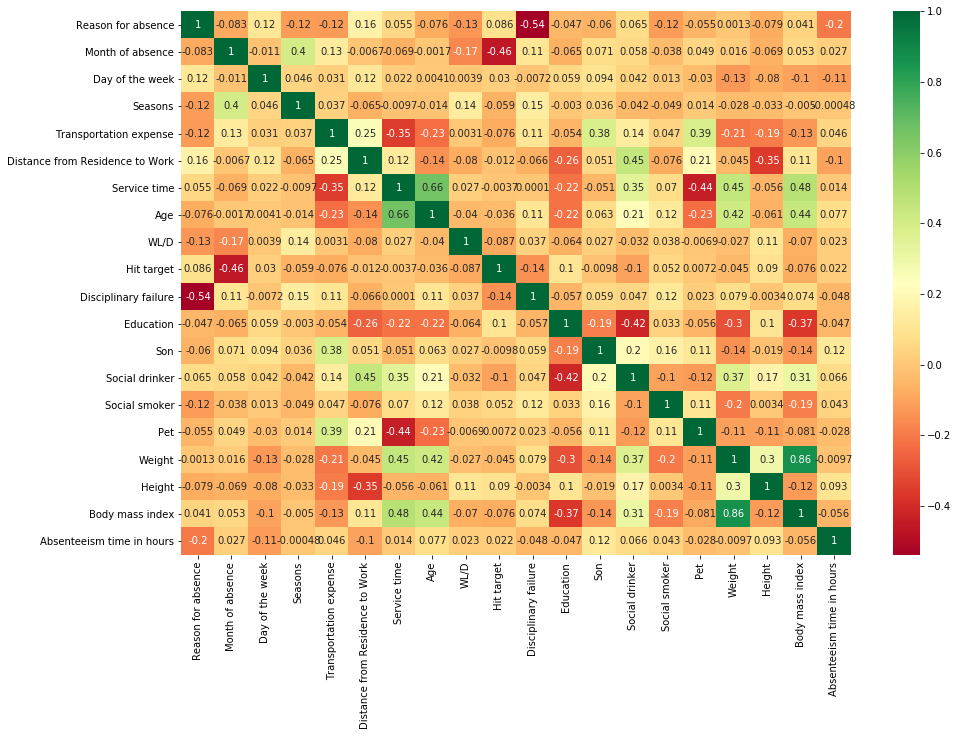

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [25]:
#so from the above we can see that most of the values are negatively correlated amongst each other

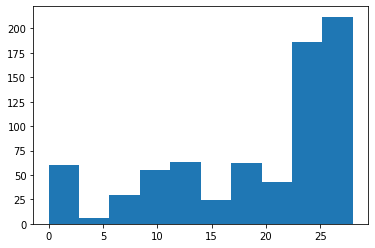

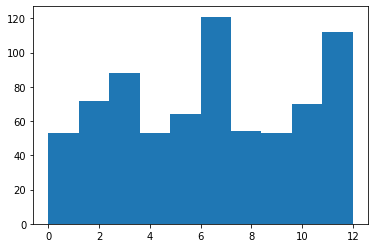

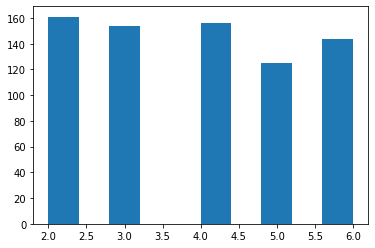

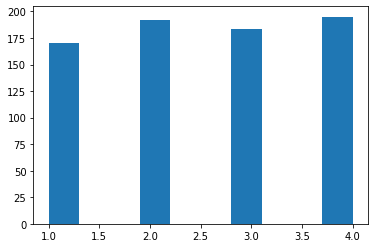

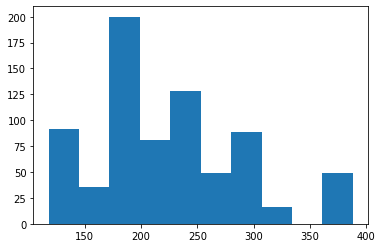

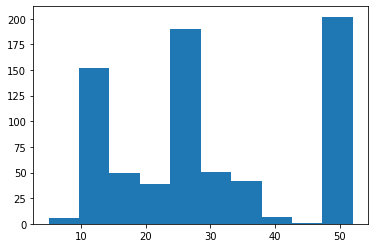

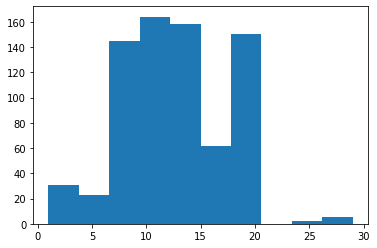

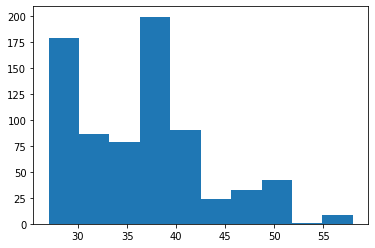

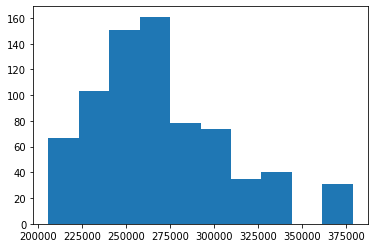

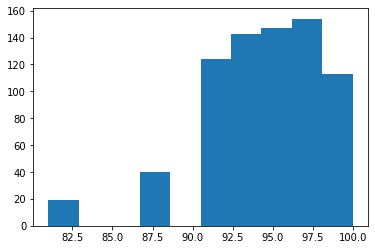

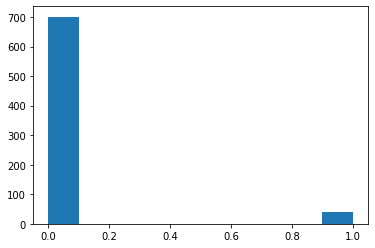

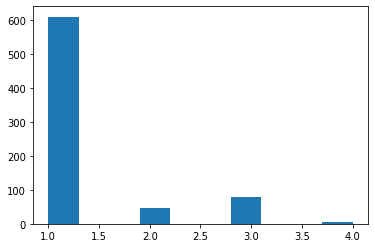

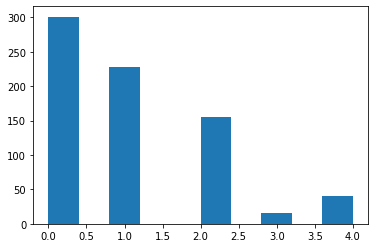

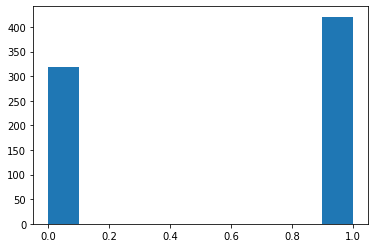

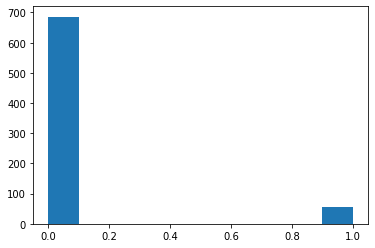

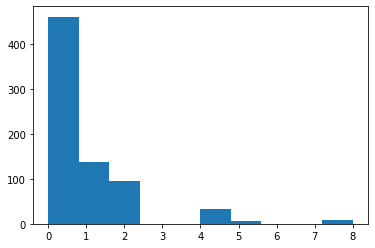

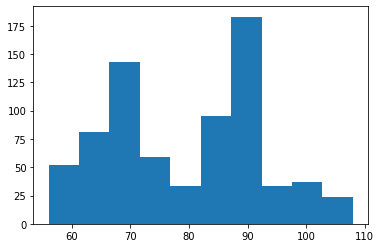

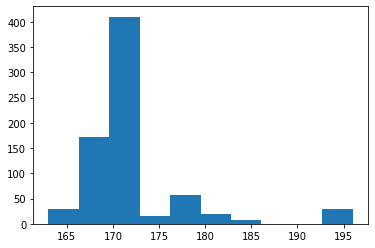

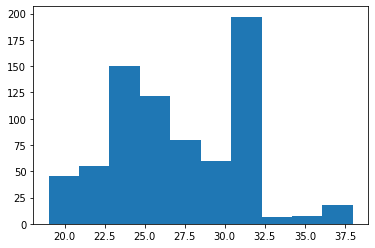

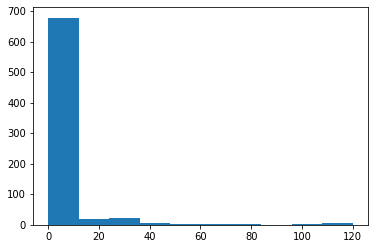

In [26]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

<Figure size 720x1080 with 0 Axes>

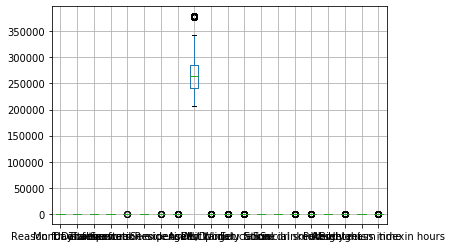

<Figure size 720x1080 with 0 Axes>

In [27]:
df.boxplot()
plt.figure(figsize=(10,15))

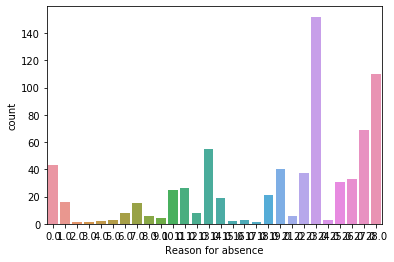

In [28]:
sns.countplot(df['Reason for absence'])   #shows the max absence for the reason

Text(0, 0.5, 'Absenteeism')

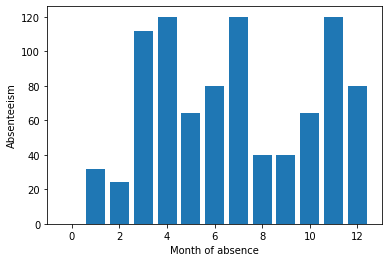

In [29]:
plt.bar(df['Month of absence'],df['Absenteeism time in hours'])  #plotting the absenteeism against month
plt.xlabel('Month of absence')
plt.ylabel('Absenteeism')

Text(0, 0.5, 'Absenteeism in hrs')

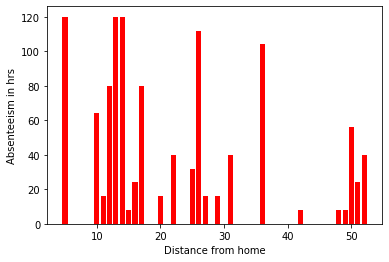

In [30]:
plt.bar(df['Distance from Residence to Work'],df['Absenteeism time in hours'],color='red')
plt.xlabel('Distance from home')
plt.ylabel('Absenteeism in hrs')

Text(0, 0.5, 'absent time')

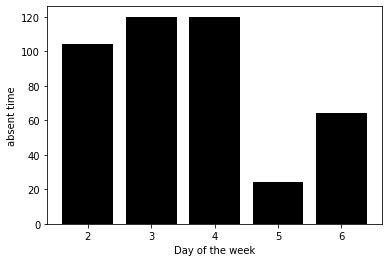

In [31]:
plt.bar(df['Day of the week'],df['Absenteeism time in hours'],color='black')
plt.xlabel('Day of the week')
plt.ylabel('absent time')

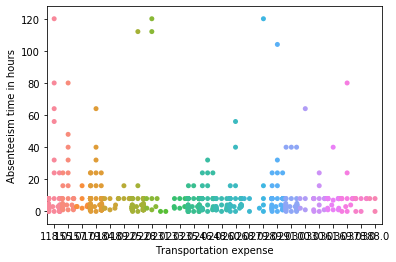

In [32]:
sns.swarmplot(df['Transportation expense'],df['Absenteeism time in hours'])

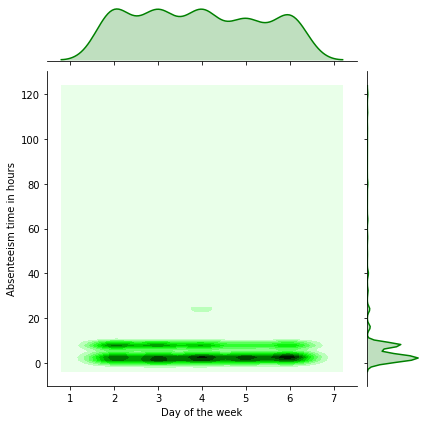

In [99]:
sns.jointplot(df['Day of the week'],df['Absenteeism time in hours'],kind='kde',color='green')
plt.show()

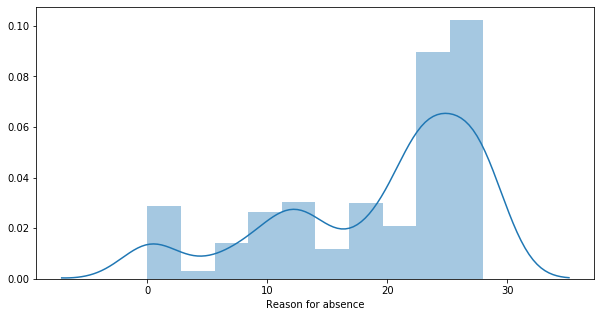

In [100]:
plt.figure(figsize=(10,5))
sns.distplot(df['Reason for absence'])

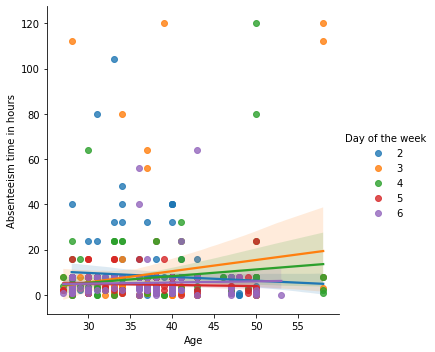

In [34]:
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Day of the week')

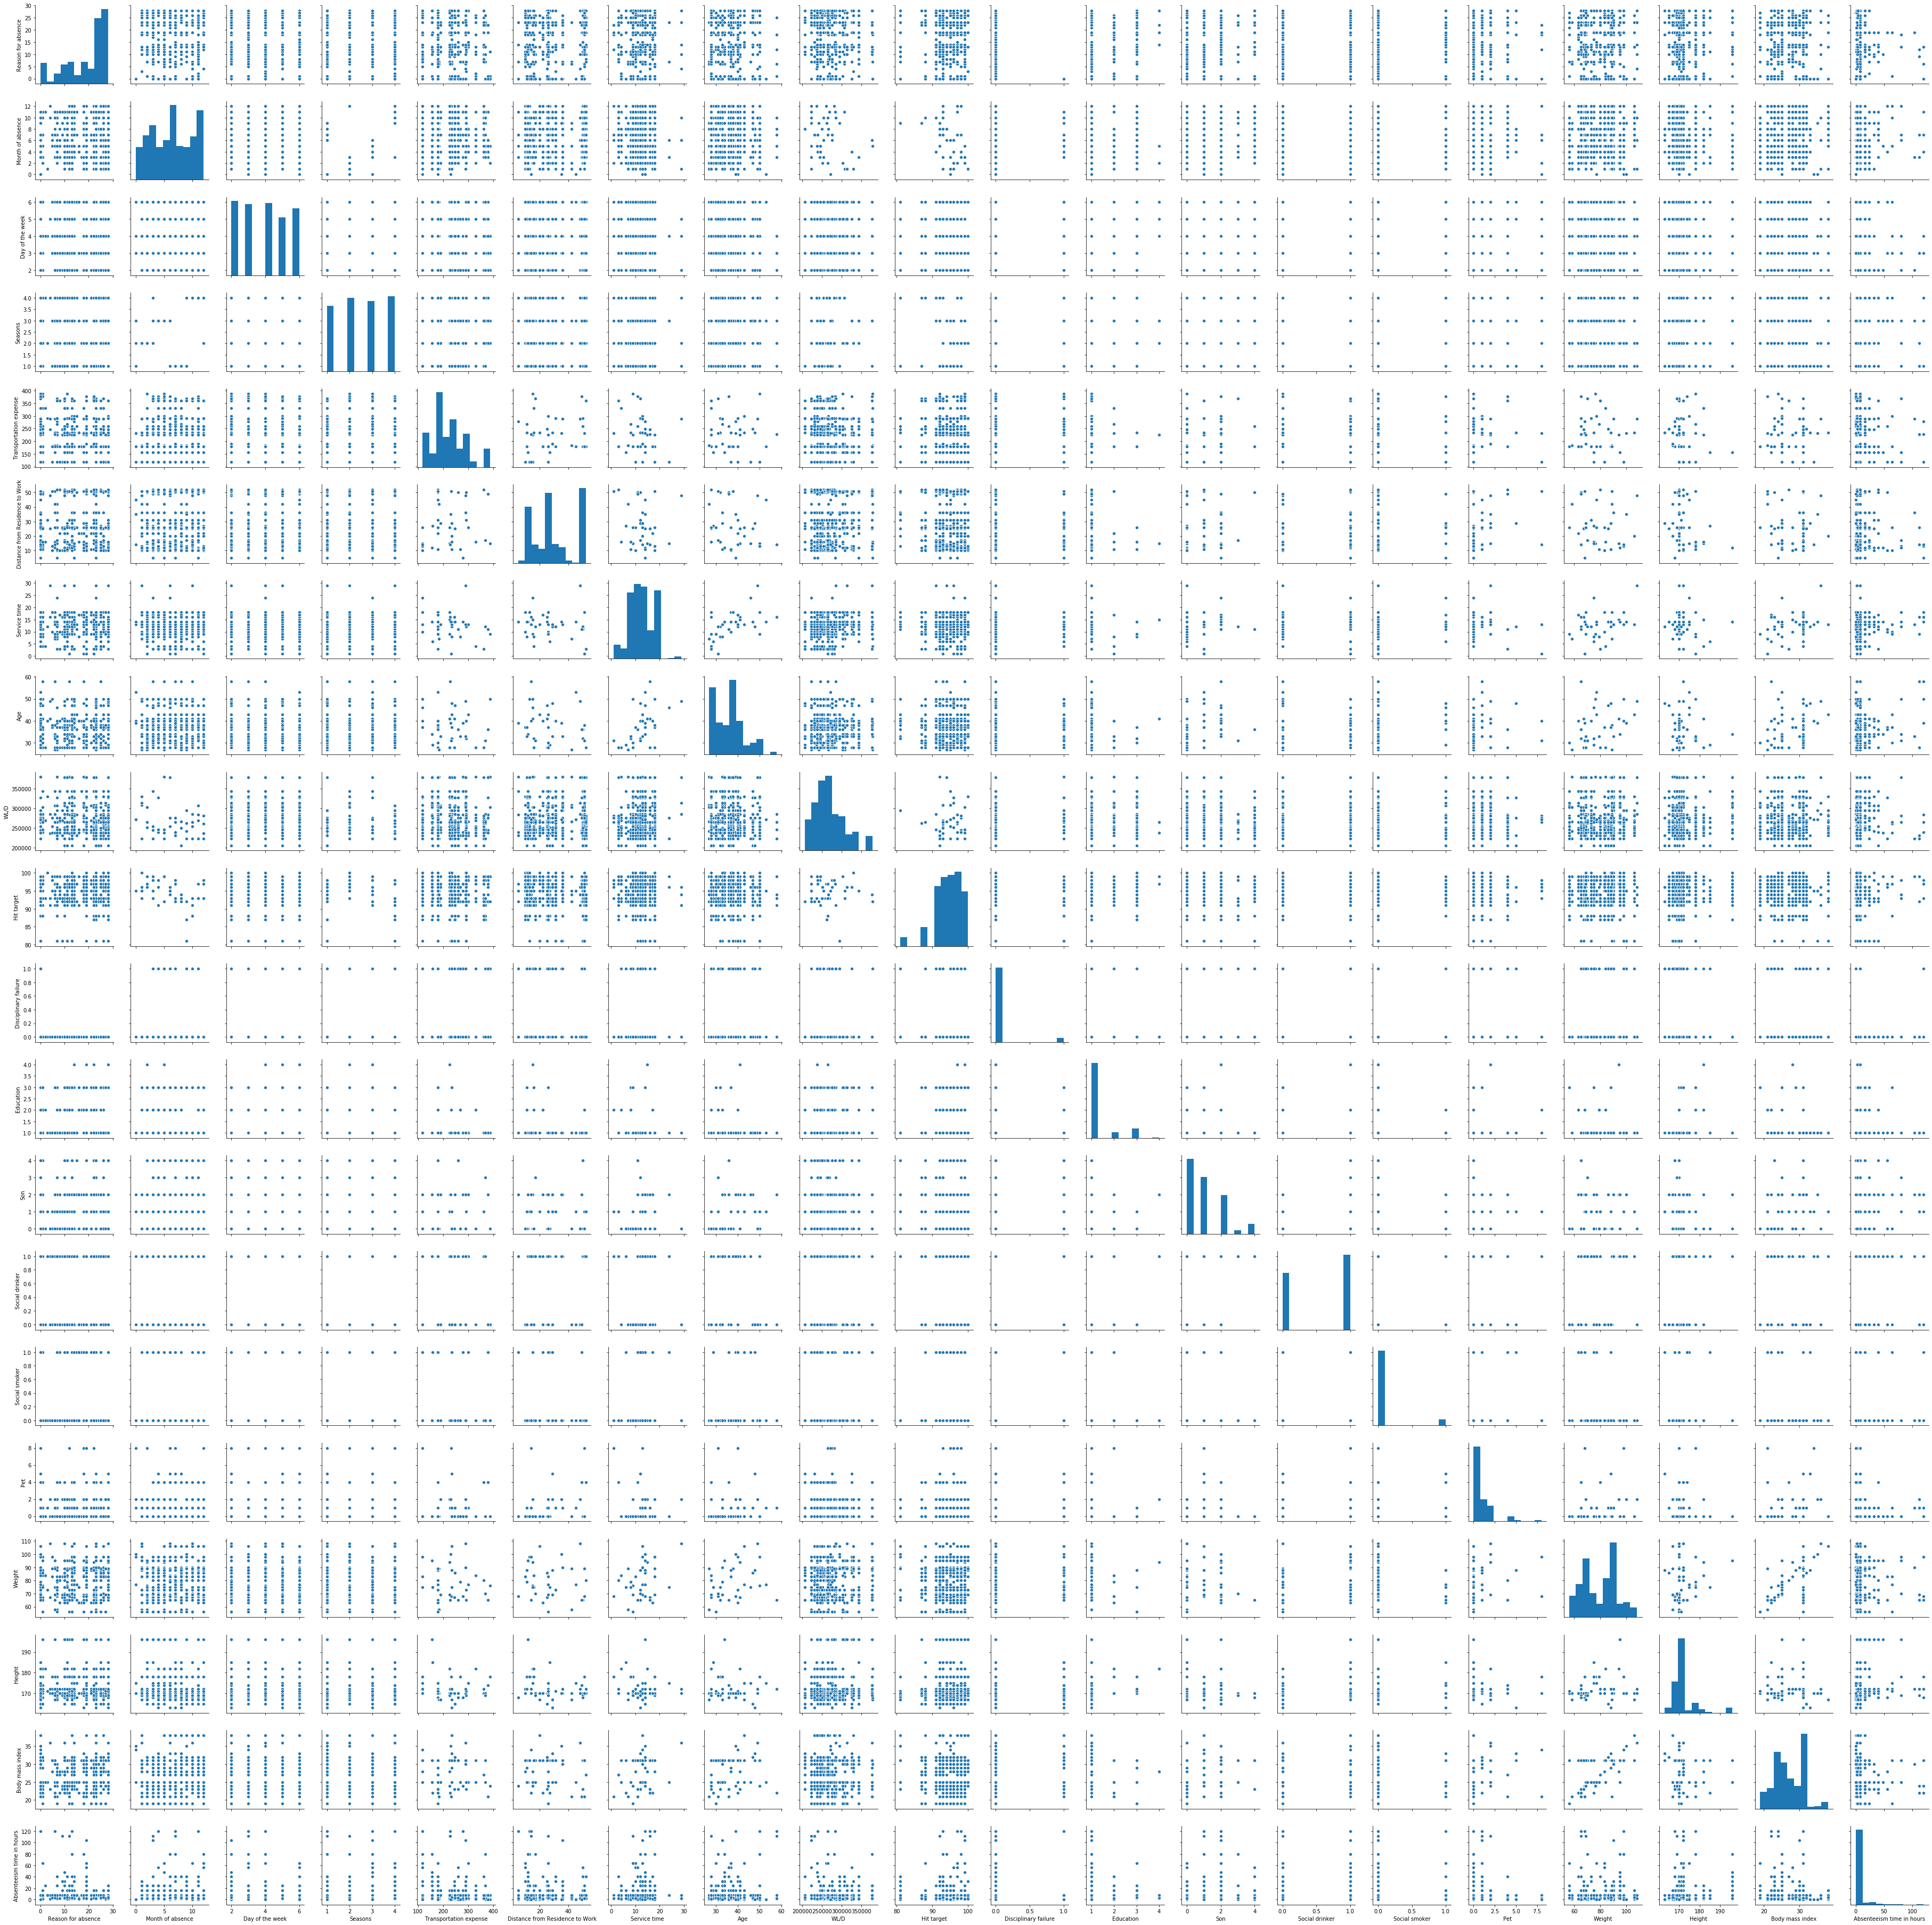

In [236]:
sns.pairplot(df)

In [36]:
#removing the outliers

In [37]:
from scipy.stats import zscore

In [38]:
z=np.abs(zscore(df))

In [39]:
threshold=3
print(np.where(z>3))

(array([  1,   3,   8,  27,  31,  31,  33,  33,  38,  38,  44,  51,  54,
        55,  58,  64,  83,  85,  89,  91,  99, 104, 116, 140, 157, 158,
       164, 165, 167, 169, 172, 180, 186, 188, 197, 199, 200, 203, 203,
       203, 205, 206, 210, 213, 213, 214, 215, 215, 216, 226, 231, 232,
       234, 236, 242, 245, 251, 253, 255, 256, 257, 270, 271, 272, 273,
       273, 274, 275, 276, 276, 277, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 285, 286, 287, 288, 293, 294, 299, 300, 303, 311, 312,
       313, 313, 322, 323, 325, 336, 336, 337, 337, 337, 355, 360, 362,
       384, 396, 397, 400, 405, 406, 407, 420, 421, 432, 433, 434, 446,
       468, 469, 469, 471, 479, 481, 488, 498, 507, 510, 513, 521, 530,
       548, 549, 551, 562, 564, 569, 569, 572, 573, 575, 576, 577, 579,
       592, 594, 601, 603, 608, 620, 622, 622, 640, 647, 648, 652, 661,
       670, 675, 681, 682, 682, 683, 688, 690, 690, 691, 692, 692, 695,
       702, 703, 704, 706, 710, 712, 714, 714, 714, 715, 721, 7

In [40]:
df_new=df[(z<3).all(axis=1)]

In [41]:
df_new.shape   #shape of the dataset after removing outliers

(577, 20)

In [42]:
df.shape   #original shape of the dataset

(740, 20)

In [43]:
#splitting the dataset in x and y 

In [44]:
x=df.drop('Absenteeism time in hours',axis=1)
x.shape

(740, 19)

In [45]:
y=df['Absenteeism time in hours'].values

In [46]:
y=y.reshape(-1,1)
y.shape

(740, 1)

In [47]:
#now we reduce the dimension of the dataset using dimensionality reduction technique(pca)

In [160]:
from sklearn.decomposition import PCA

In [161]:
pca=PCA(n_components=9)

In [162]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-30972.794713,68.113206,-2.802076,12.986984,-7.889241,-3.183789,-1.090150,-2.393118,-1.850105
1,-30972.794262,-104.214924,15.136708,18.343340,19.433432,1.880420,4.463156,-1.130578,1.432737
2,-30972.795719,-40.760627,-23.477312,8.501779,0.962259,-0.277468,0.689027,-1.205774,-1.604566
3,-30972.793143,57.487475,29.864968,-7.296411,8.724240,7.796511,0.216431,-3.430944,-3.764960
4,-30972.794627,68.158640,-2.350234,13.078871,-4.998448,-3.561043,-1.153296,-2.608953,-1.927033


In [163]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WL/D,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [164]:
#now we will use scaling technique to standardize the dataset

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
std=StandardScaler()

In [167]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,-0.792095,1.017528,-0.192005,0.953654,-0.973959,-0.475914,-0.223664,-0.569017,-0.703837
1,-0.792095,-1.556843,1.037204,1.346980,2.399137,0.281086,0.915696,-0.268820,0.545057
2,-0.792095,-0.608914,-1.608722,0.624299,0.118795,-0.041476,0.141366,-0.286700,-0.610426
3,-0.792095,0.858792,2.046420,-0.535787,1.077043,1.165426,0.044405,-0.815784,-1.432307
4,-0.792095,1.018207,-0.161044,0.960402,-0.617079,-0.532306,-0.236619,-0.620337,-0.733103


In [168]:
y=std.fit_transform(y)
y=pd.DataFrame(data=y)
y

,0
0,-0.226736
1,-0.528236
2,-0.377486
3,-0.226736
4,-0.377486
...,...
735,0.074764
736,-0.226736
737,-0.528236
738,-0.528236


In [105]:
x.skew()

0    0.970558
1    0.397804
2   -0.397957
3   -0.078650
4    0.854952
5   -0.407980
6    0.483483
7    0.435906
8    0.570116
dtype: float64

In [106]:
#now with the help of linear regression we will build our model and check the accuracy

In [107]:
#importing all required libraries

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [109]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression(normalize=True)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.021870375060610514
the r2 score corrosponding to the random state 43 is: 0.043200267622691135
the r2 score corrosponding to the random state 44 is: -0.022970058551608608
the r2 score corrosponding to the random state 45 is: -0.02068624530647467
the r2 score corrosponding to the random state 46 is: 0.032687906772248976
the r2 score corrosponding to the random state 47 is: -0.3165721821308549
the r2 score corrosponding to the random state 48 is: 0.057094473731451045
the r2 score corrosponding to the random state 49 is: -0.04740671498307458
the r2 score corrosponding to the random state 50 is: -0.017979136928832462
the r2 score corrosponding to the random state 51 is: 0.03721239251517883
the r2 score corrosponding to the random state 52 is: 0.0566922147955532
the r2 score corrosponding to the random state 53 is: 0.044790127761515475
the r2 score corrosponding to the random state 54 is: -0.06543192785073293
the r2 score corrosponding 

In [148]:
# we are not getting the satisfactory result from Regressor model

In [110]:
lr.coef_

array([[ 0.07335493,  0.05055434,  0.15420652,  0.00767705,  0.1448986 ,
        -0.02397956,  0.07039614,  0.01970077, -0.06291132]])

In [111]:
lr.intercept_

array([0.00116301])

In [112]:
from math import sqrt
print(sqrt(mean_absolute_error(y_test,pred)))   #rms error

0.665428450003046


In [113]:
print(mean_absolute_error(y_test,pred))

0.4427950220734562


In [114]:
#performing regularisation by finding the best hyper parameter

In [115]:
from sklearn.linear_model import Lasso,Ridge

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
ls=Lasso()
rg=Ridge()

In [118]:
params={'alpha':[1.0,0.1,0.01,0.001]}

In [119]:
gd=GridSearchCV(estimator=ls,param_grid=params)
gd1=GridSearchCV(estimator=rg,param_grid=params)

In [120]:
gd.fit(x,y)
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
gd.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
gd.best_score_

0.017442899299468538

In [123]:
gd1.best_score_

-0.0015550919604065086

In [124]:
#trying to improve the score using cross validation

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
score=cross_val_score(lr,x,y,cv=5)
score

array([ 0.01549367, -0.093073  ,  0.04920619, -0.0237748 ,  0.04361659])

In [127]:
#now we will check with other models whether score will improve 

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [129]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score -0.10202038218527298
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.40906192653308737
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.7035242550902442
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.06521405716437711
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.3195692990431804
SVR(C=1.0,

In [131]:
#using grid search cv to find the best hyper parameter for svr

In [132]:
params={'kernel':('rbf','poly','linear'),'C':[0,1,10]}

In [133]:
gd2=GridSearchCV(estimator=SVR(),param_grid=params)

In [134]:
gd2.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
gd2.best_params_

{'C': 1, 'kernel': 'rbf'}

In [136]:
gd2.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [137]:
gd2.best_score_

-0.0065370176318461535

In [138]:
#find r2 scores at different n_neighbors for KNN

In [139]:
for i in range(2,22):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print("r2 score at neighbor",i,"is:",r2_score(y_test,pred))

r2 score at neighbor 2 is: 0.015855654831434474
r2 score at neighbor 3 is: -0.1138917024804249
r2 score at neighbor 4 is: -0.11737349097030081
r2 score at neighbor 5 is: -0.10202038218527298
r2 score at neighbor 6 is: -0.09518575414839403
r2 score at neighbor 7 is: -0.1104054313887759
r2 score at neighbor 8 is: -0.0761382247435971
r2 score at neighbor 9 is: -0.06535211336275193
r2 score at neighbor 10 is: -0.04966617599797174
r2 score at neighbor 11 is: -0.04552755931755592
r2 score at neighbor 12 is: -0.03959072028078747
r2 score at neighbor 13 is: -0.03911728746105014
r2 score at neighbor 14 is: -0.034870898539953066
r2 score at neighbor 15 is: 0.029183897742278697
r2 score at neighbor 16 is: 0.0894847234676287
r2 score at neighbor 17 is: 0.09141770784853998
r2 score at neighbor 18 is: 0.08780519329733749
r2 score at neighbor 19 is: 0.07836498420711291
r2 score at neighbor 20 is: 0.07557388125709241
r2 score at neighbor 21 is: 0.06871129064808768


In [140]:
#now will try to boost the result through ensemble techniques

In [141]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [142]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [143]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: -0.061344941446823675
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.07625444537107384
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.0314481209158628


In [97]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.06053350727625073
r2 score at lerning rate 0.01 is: 0.0583891165551238
r2 score at lerning rate 1.0 is: -0.1770930316842947


In [98]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.06509360683343868
r2 score at 200 is: 0.08481819569755789
r2 score at 250 is: 0.07202629609216826
r2 score at 300 is: 0.07031790613626132
r2 score at 350 is: 0.06039220927893807


In [147]:
#from the above we can conclude that model is predicting nothing as we are getting the very low r2 score

# USING A CATAGORICAL APPROACH TO CHECK WHETHER ACCURACY WILL IMPROVE OR NOT

In [169]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,WL/D,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [170]:
df['Absenteeism time in hours'].unique()

array([  4.,   0.,   2.,   8.,  40.,   1.,   7.,   3.,  32.,   5.,  16.,
        24.,  64.,  56.,  80., 120., 112., 104.,  48.])

In [171]:
#as the output is discrete will try classifiers to improve the accuracy of the model

In [172]:
y=df['Absenteeism time in hours'].values
y=y.reshape(-1,1)

In [173]:
x.shape

(740, 9)

In [174]:
y.shape

(740, 1)

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [178]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.3310810810810811
accuracy score corrosponding to random state: 43 is: 0.3918918918918919
accuracy score corrosponding to random state: 44 is: 0.2972972972972973
accuracy score corrosponding to random state: 45 is: 0.30405405405405406
accuracy score corrosponding to random state: 46 is: 0.3581081081081081
accuracy score corrosponding to random state: 47 is: 0.3310810810810811
accuracy score corrosponding to random state: 48 is: 0.41216216216216217
accuracy score corrosponding to random state: 49 is: 0.40540540540540543
accuracy score corrosponding to random state: 50 is: 0.3310810810810811
accuracy score corrosponding to random state: 51 is: 0.41216216216216217
accuracy score corrosponding to random state: 52 is: 0.28378378378378377
accuracy score corrosponding to random state: 53 is: 0.39864864864864863
accuracy score corrosponding to random state: 54 is: 0.30405405405405406
accuracy score corrosponding to random state: 55 is: 0.30

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.20)

In [181]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.3918918918918919
accuracy score for neighbors 2 is: 0.3918918918918919
accuracy score for neighbors 3 is: 0.4391891891891892
accuracy score for neighbors 4 is: 0.43243243243243246
accuracy score for neighbors 5 is: 0.41216216216216217
accuracy score for neighbors 6 is: 0.4527027027027027
accuracy score for neighbors 7 is: 0.44594594594594594
accuracy score for neighbors 8 is: 0.47297297297297297
accuracy score for neighbors 9 is: 0.44594594594594594
accuracy score for neighbors 10 is: 0.4391891891891892
accuracy score for neighbors 11 is: 0.43243243243243246
accuracy score for neighbors 12 is: 0.4189189189189189
accuracy score for neighbors 13 is: 0.4391891891891892
accuracy score for neighbors 14 is: 0.4594594594594595
accuracy score for neighbors 15 is: 0.4391891891891892
accuracy score for neighbors 16 is: 0.43243243243243246
accuracy score for neighbors 17 is: 0.41216216216216217
accuracy score for neighbors 18 is: 0.42567567567567566
accuracy s

In [182]:
#so from the above ,we are getting a max of 47%accuracy result from knn at n_neighbors=8

In [183]:
svc=SVC()
svc.fit(x_train,y_train)
preds=svc.predict(x_test)

In [184]:
accuracy_score(y_test,preds)

0.4189189189189189

In [185]:
#using gridsearchcv to find the best hyperparameter for SVC

In [186]:
param={'kernel':('rbf','poly','linear'),'C':[0,1,10]}

In [187]:
gd=GridSearchCV(estimator=svc,param_grid=param)

In [188]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [189]:
gd.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [190]:
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [191]:
gd.best_score_

0.3810810810810811

In [192]:
#using ensemble technique to improve the r2 score

In [193]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [194]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestClassifier(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('accuracy score at',i,'is:',accuracy_score(y_test,predrd))

accuracy score at 150 is: 0.4797297297297297
accuracy score at 200 is: 0.4797297297297297
accuracy score at 250 is: 0.4527027027027027
accuracy score at 300 is: 0.4797297297297297
accuracy score at 350 is: 0.46621621621621623


In [195]:
#random forest classifier is giving a max of 48% accuracy score

In [196]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingClassifier(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predgd))

accuracy score at 0.1 is: 0.4594594594594595
accuracy score at 0.01 is: 0.4391891891891892
accuracy score at 1.0 is: 0.3108108108108108


In [197]:
a=[100,200,50,150]
for i in a:
    ad=AdaBoostClassifier(base_estimator=dtc,n_estimators=i)
    ad.fit(x_train,y_train)
    predad=ad.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predad))

accuracy score at 100 is: 0.4797297297297297
accuracy score at 200 is: 0.49324324324324326
accuracy score at 50 is: 0.44594594594594594
accuracy score at 150 is: 0.4527027027027027


In [198]:
a1={'model':('regressor model','DecisionTreeClassifier','SVC','KNeighborsClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier'),'AccuracyScore':['10%','47%','41%','47%','48%','45%','49%']}

In [200]:
results=pd.DataFrame(data=a1)
results

,model,AccuracyScore
0,regressor model,10%
1,DecisionTreeClassifier,47%
2,SVC,41%
3,KNeighborsClassifier,47%
4,RandomForestClassifier,48%
5,GradientBoostingClassifier,45%
6,AdaBoostClassifier,49%


So from the above we can conclude that Adaboost Classifier is giving a max of 49% accuracy score so finally we will select this model for our prediction purpose. 

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.20)

In [230]:
ad=AdaBoostClassifier(base_estimator=dtc,n_estimators=100)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad=pd.DataFrame(data=predad)
predad.to_csv('absenteeism.csv')   #saved the result in csv form
print("accuracy score is:",accuracy_score(y_test,predad))

accuracy score is: 0.4864864864864865


In [231]:
#saving the final model

In [232]:
import joblib

In [235]:
joblib.dump(ad,'absenteeism_pred.obj')

['absenteeism_pred.obj']